#Multiple Linear Regression

In this Project we will build a model to predict Price of car 
It is divided into two parts: the Exploratory Data Analysis (EDA) section, which provides insights on the data through visualizations such as boxplots, scatter plots, 
histograms, bar graphs; and the Modeling section which uses linear regression to predict car prices based on features like engine size, horsepower and mileage. 
The results of this analysis can be used by car manufacturers to determine pricing strategies for new models or existing ones in order to maximize profits. 

The dataset contains information about car prices, Features , deminsion , mpg ,etc.
The data was collected from a variety of sources and includes both numerical 
and categorical variables.
* Car name:- Car Brand
* Fuel Type:- Gas or Diesel 
* Aspiration:- Std or turbo
* doornumber:- Number of door car has(Two or Four)
* Carbody:- The body of a vehicle, or its design
* drivewheel:- Rwd(Rear Wheel Drive) or Fwd(Front Wheel Drive)	
* Engine location :- Where Engine iis located(Front or Back)
* wheelbase:- the distance between the front and rear axles of a vehicle.
* carlength:- Length of Car
* carwidth:- Width of car 
* carheigth:- Height of car 
* curbweight:- the weight of the vehicle including a full tank of fuel and all standard equipment.
* enginetype:- Type of engine(ohc, ohcf, ohcv, dohc, l, rotor, dohcv)
* cylindernumber:- It refers to the number of pistons in the engine, the pistons run up and down inside the cylinders.
*  enginesize:- Size of engine.
* fuelsystem:- Type of fuel System(mpfi, 2bbl, idi , 1bbl, spdi, 4bbl, mfi, spfi)
* boreratio:- the ratio between the dimensions of the engine cylinder bore diameter to its piston stroke-length.
* compressionratio:- it’s the ratio between the maximum and minimum cylinder volume when the piston is at the bottom and top of its stroke respectively.
* horsepower:- Horsepower is a unit of power used to measure the output or performance of engines, motors, and other mechanical devices.
* peakrpm :-Peak RPM, or revolutions per minute, refers to the highest speed at which an engine can rotate
* citympg:- miles per gallon (fuel efficiency) during city driving.
* highwaympg:- miles per gallon (fuel efficiency) during highway driving.
* Price:- Price of Car


[Dataset](https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/data)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.shape

(205, 26)

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

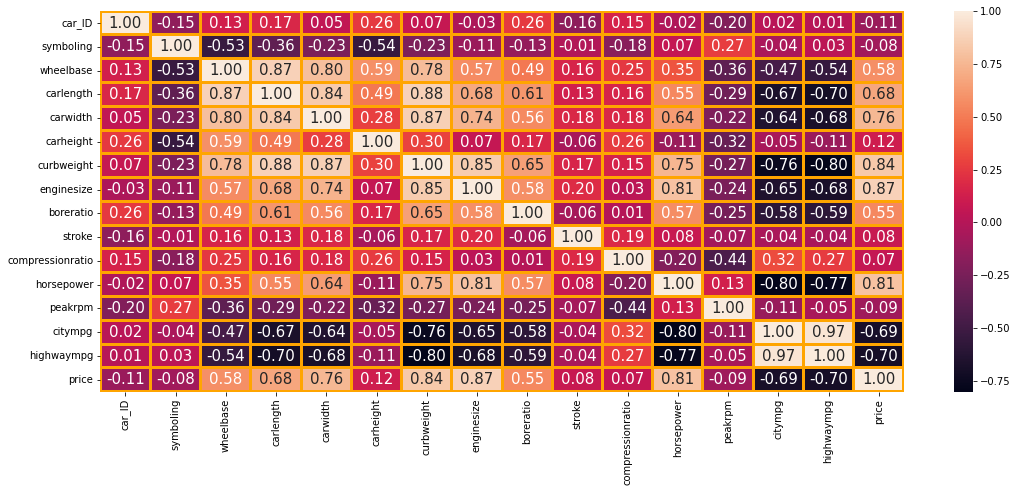

In [ ]:
# heatmap of the data for checking the correlation between the numerical features and target column.

plt.figure(figsize = (18, 7))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'orange')
plt.show()

## correlation

* Wheelbase has a 58% positive correlation with price.
* Car length and breadth has a 68% and 76% positive correlation with price, respectively.
* Curbweight has an 84% positive correlation with price.
* Engine size has an 87% positive correlation with price.
* Boreratio has a 55% positive correlation with price.
* Horsepower has an 81% positive correlation with price.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f323564bee0>,
      dtype=object)

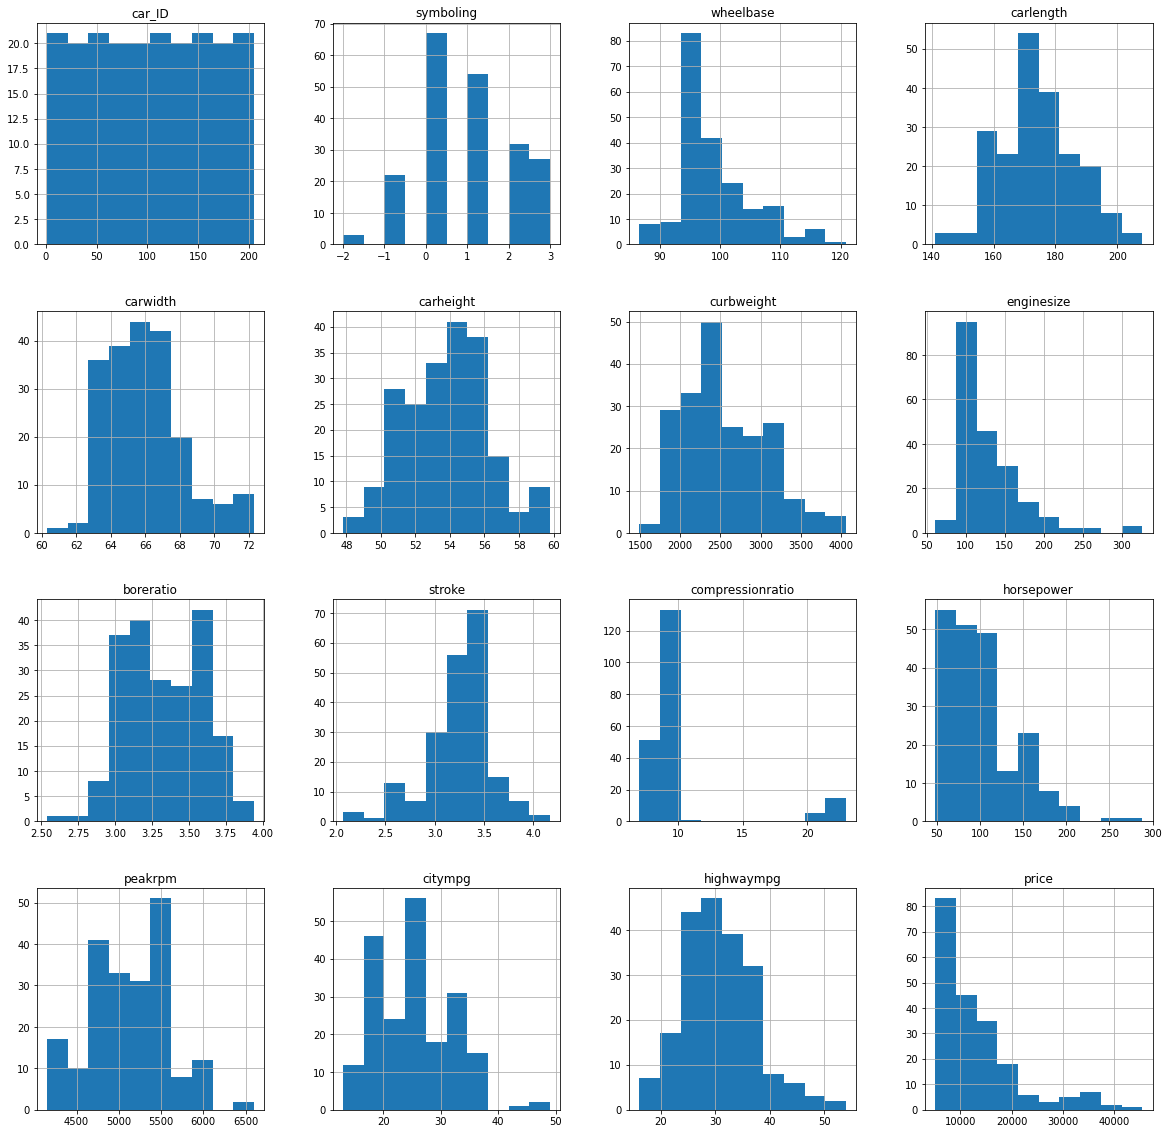

In [ ]:
df.hist(figsize=(20,20))

In [ ]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

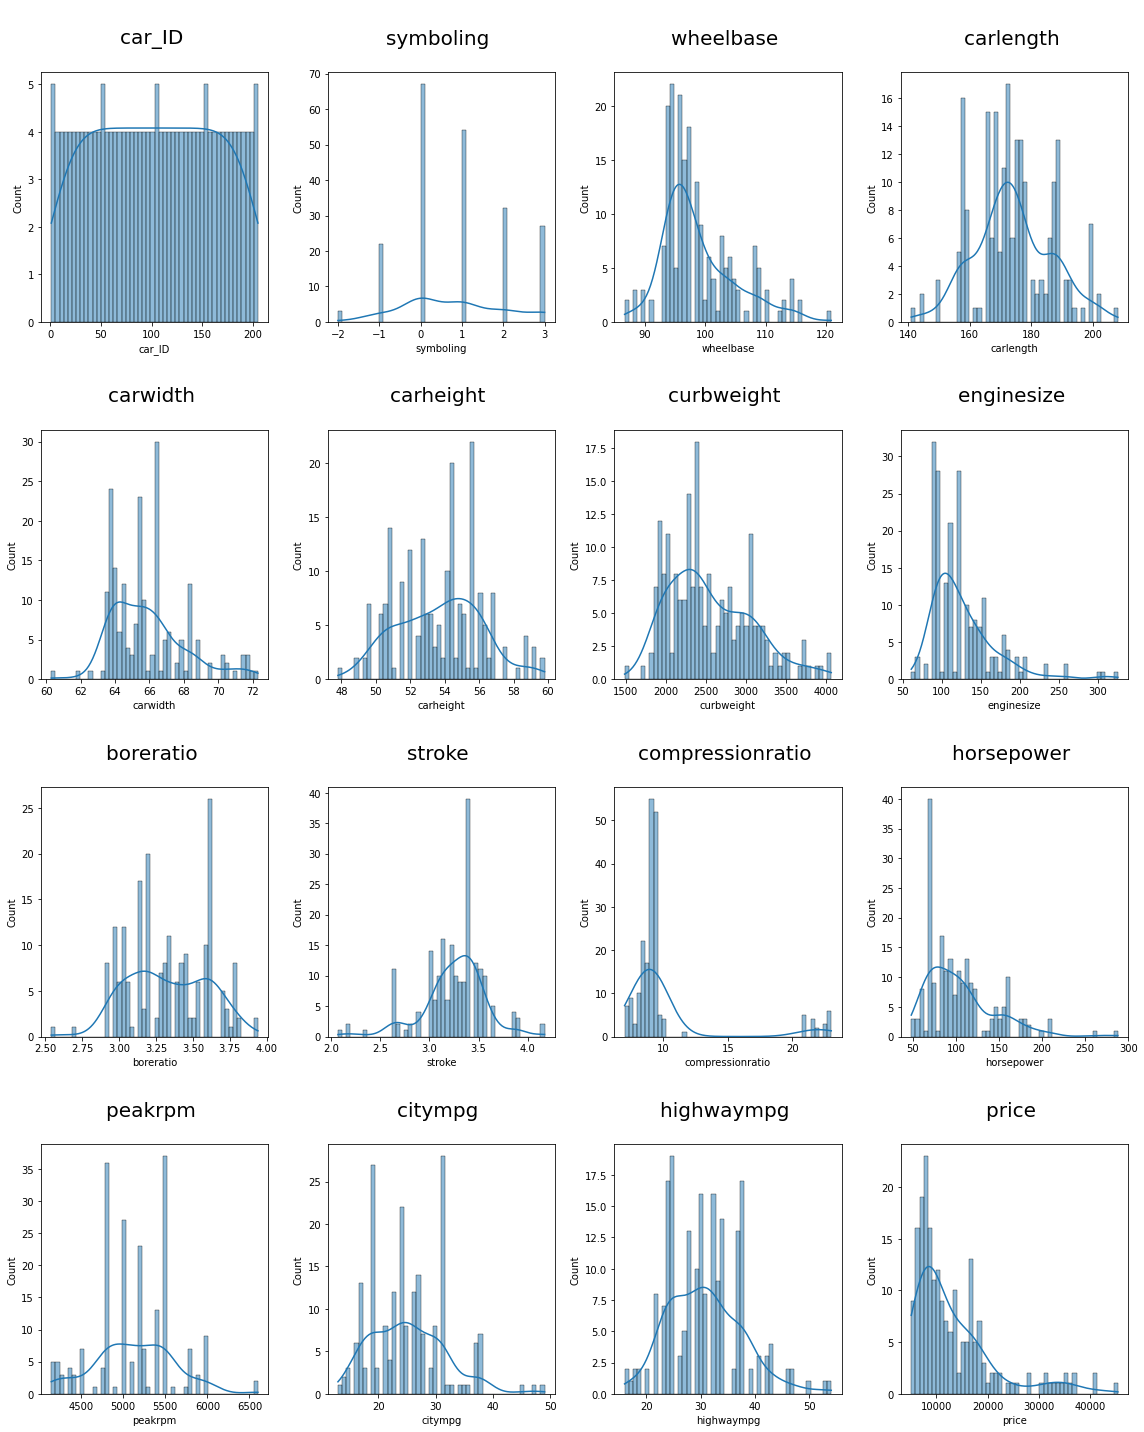

In [ ]:
c=num_cols.columns
plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(c)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.histplot(x = c[i], data = df, ax = ax, palette='rocket', kde = True, bins = 50)
        plt.title(f"\n{c[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()



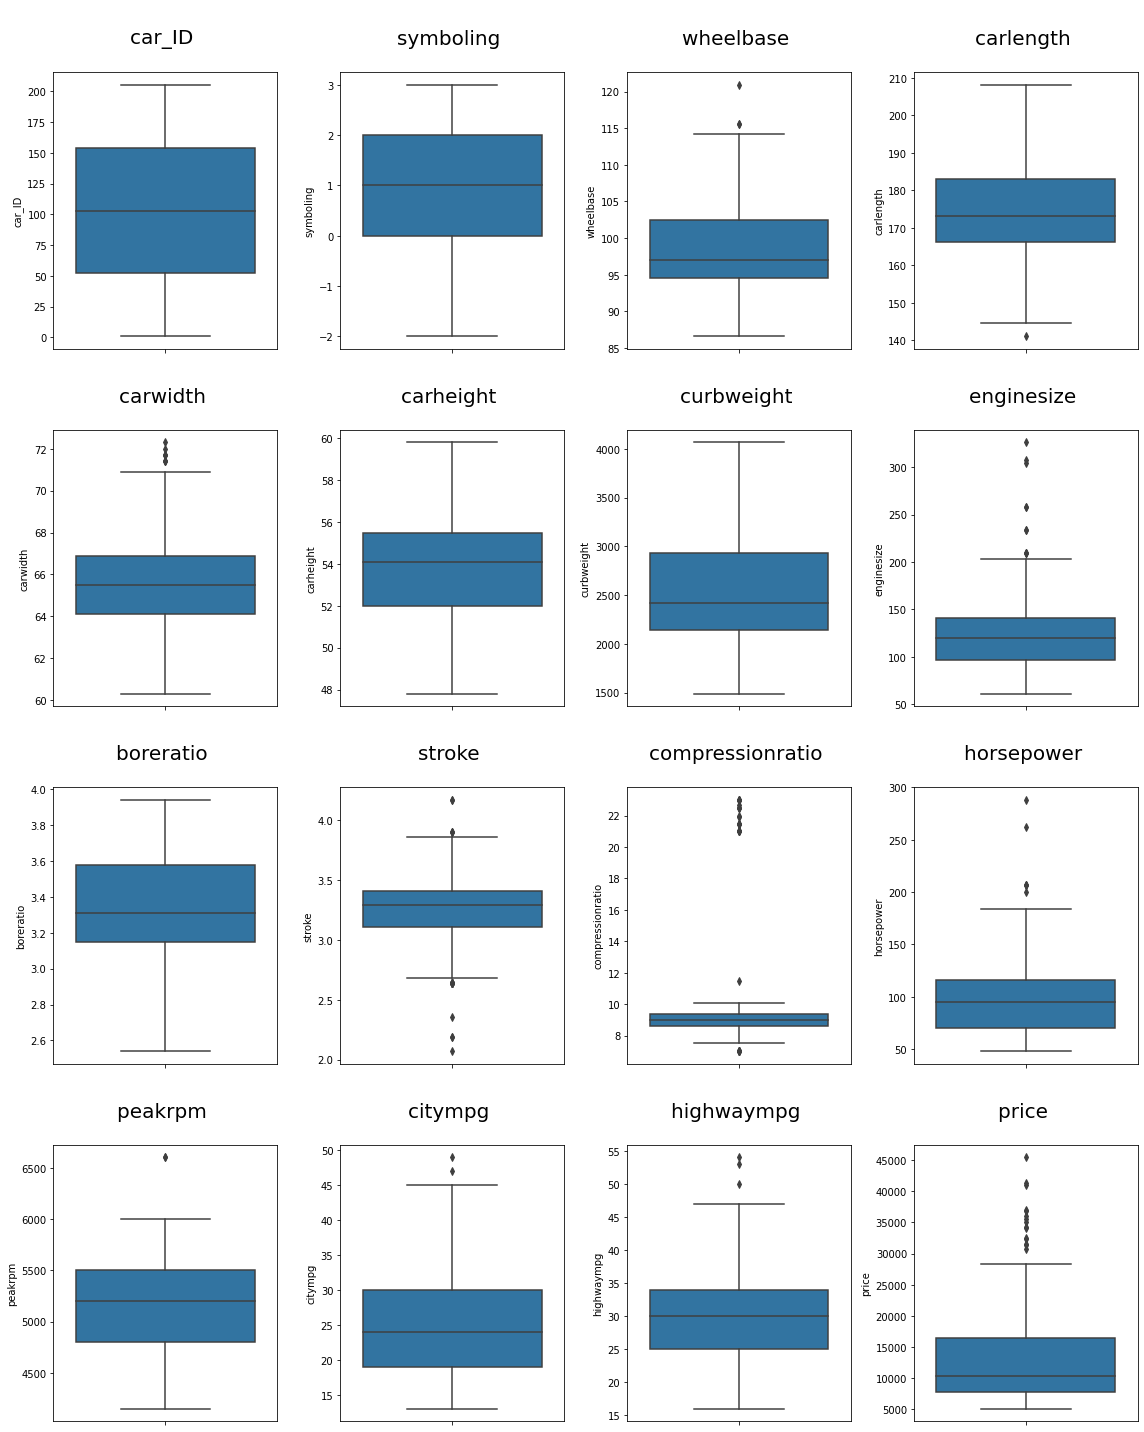

In [ ]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

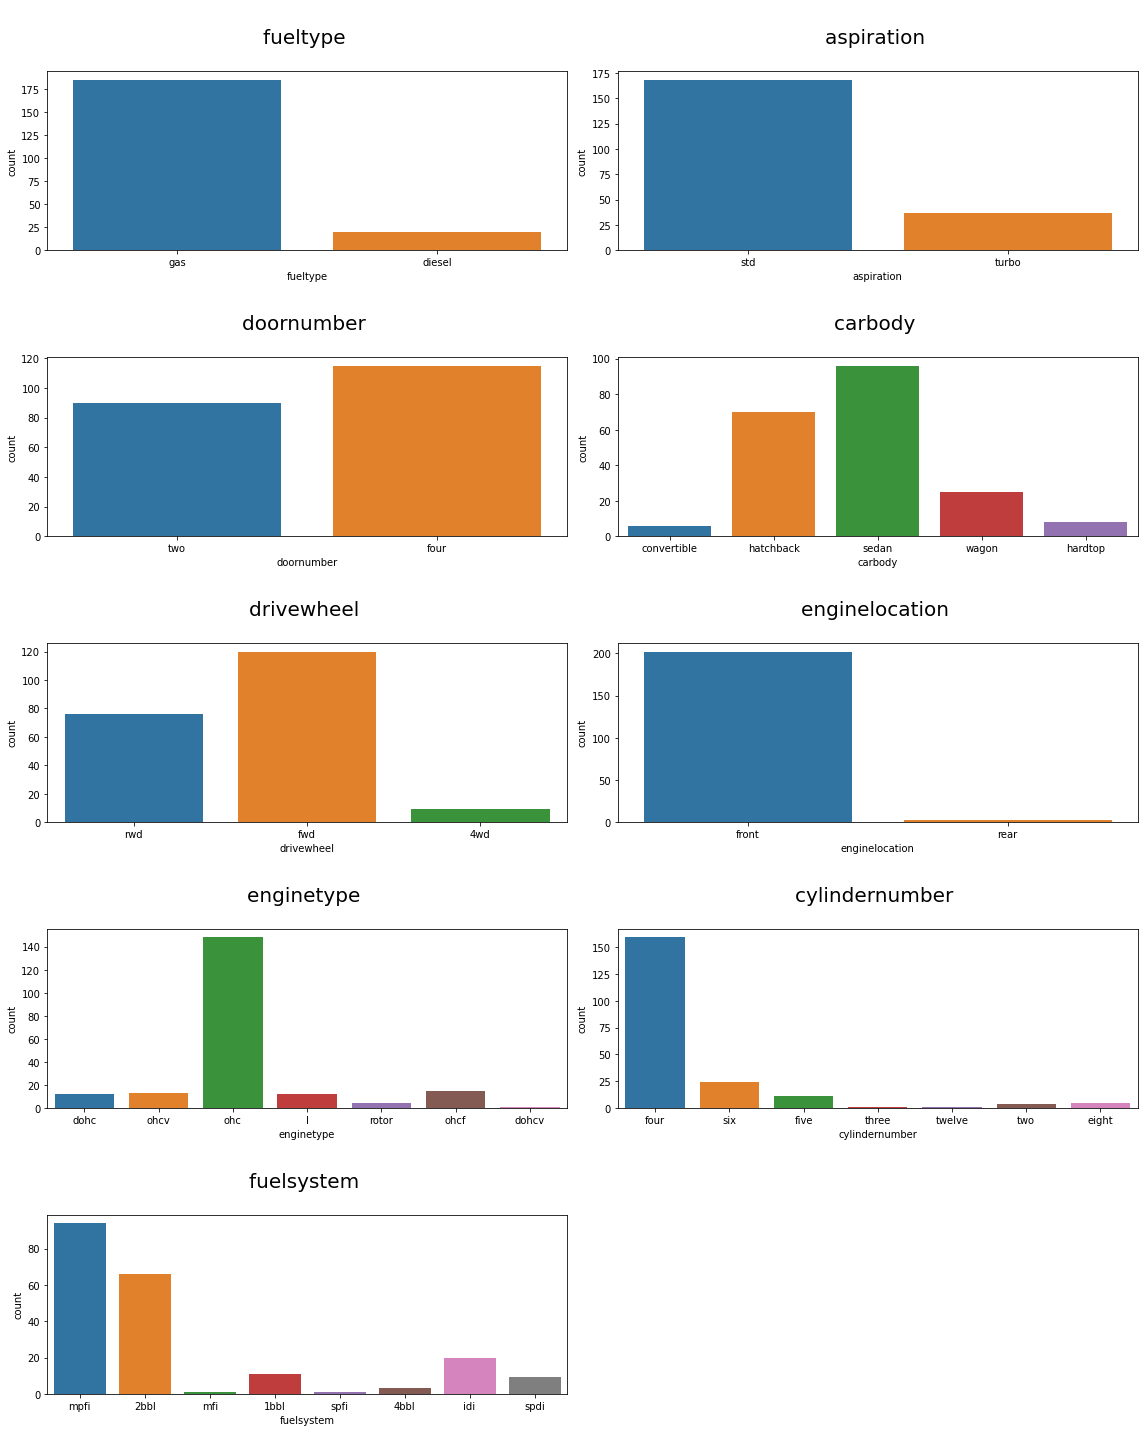

In [ ]:
cols = cat_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

* Most on car has engine in front then back.                
* Most on car has std aspiartion                                    
* Most on car has ohc engine type
* Most on car has gas Fueltype

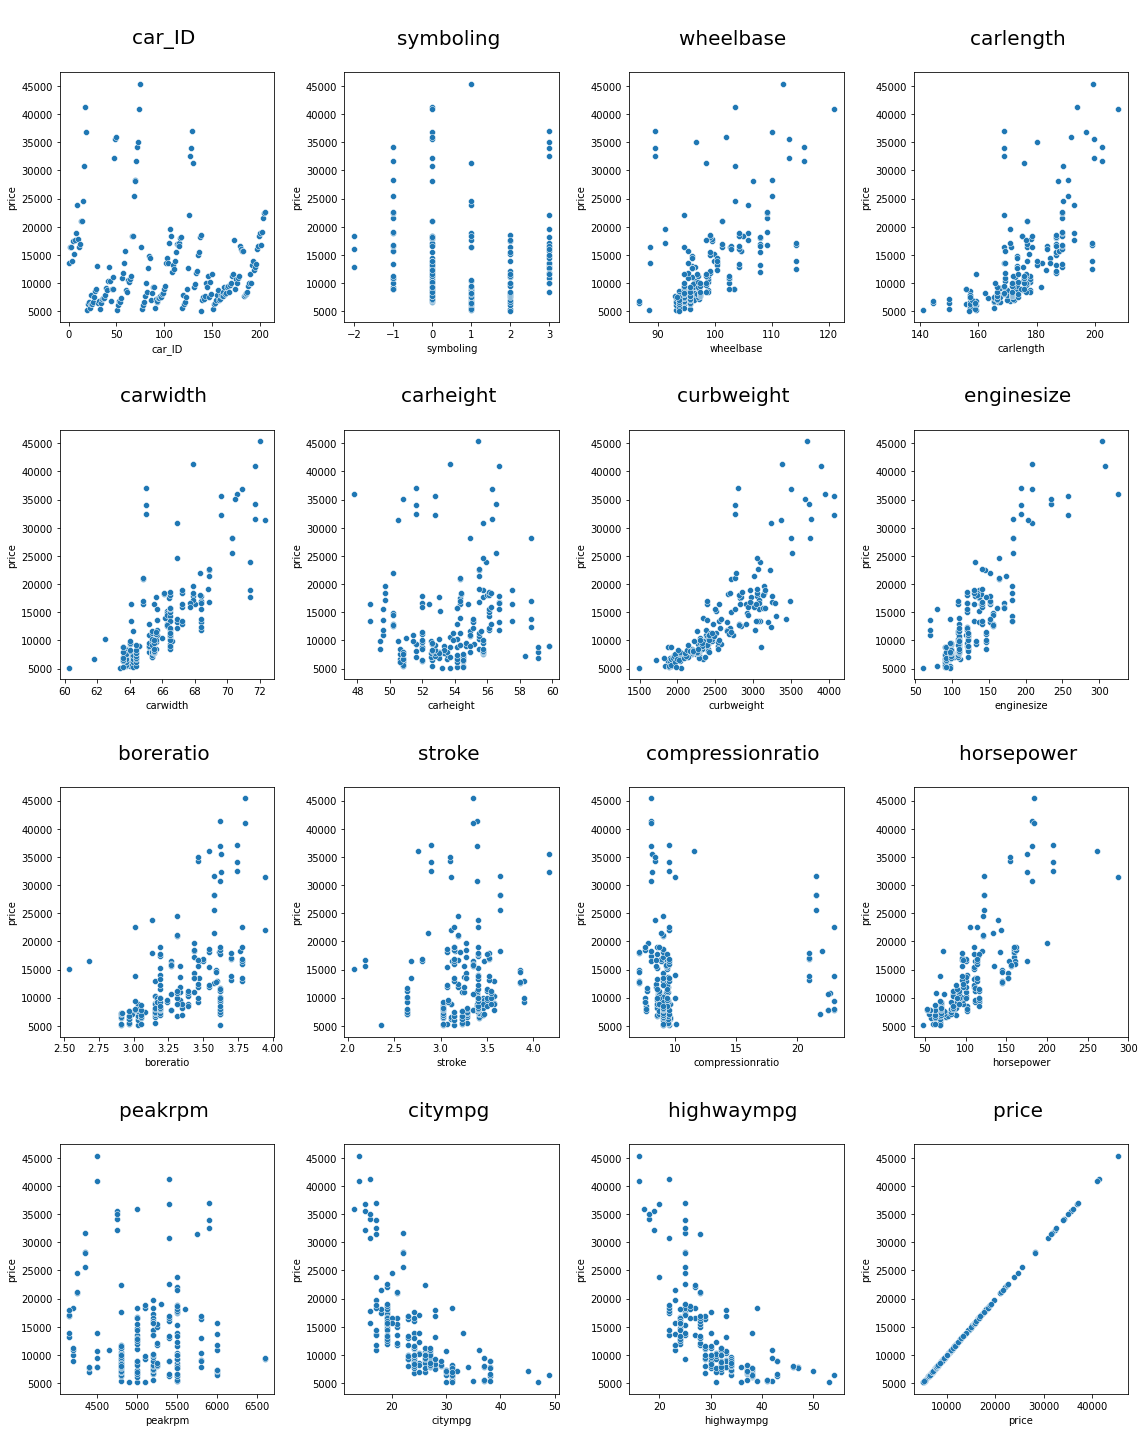

In [ ]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sns.scatterplot(x = cols[i], y = df['price'], data = df, ax =ax , palette='rocket')
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

- Wheelbase of car is increasing than the price is also increasing.
- Car length and car width increasing then price also increases
- Heavy cars has higher price.
- Cars having powerful engine are having high prices.
- Cars with lower mpg are costly.

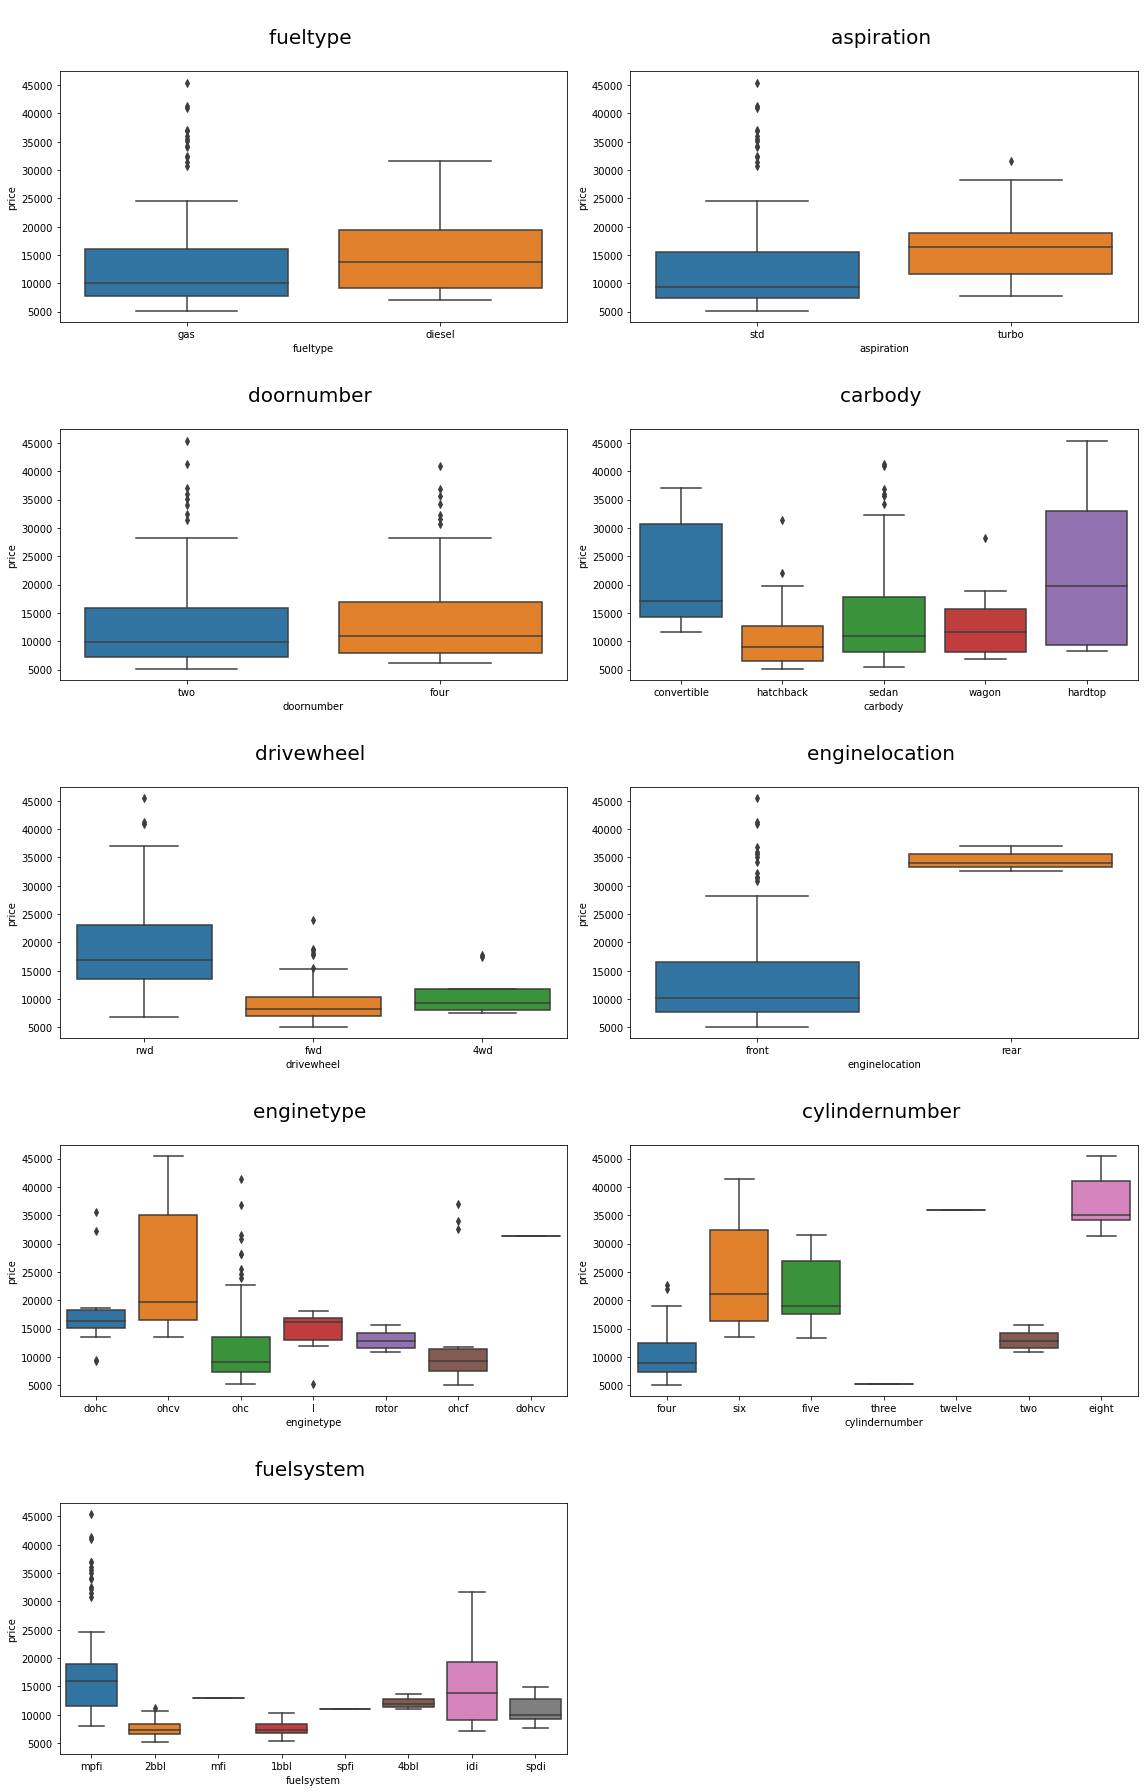

In [ ]:
cols = cat_cols.columns

plt.figure(figsize = (16, 25))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <= 10:
        ax = plt.subplot(5, 2, plotnumber)
        sns.boxplot(x = cols[i] ,y = df['price'], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [ ]:
df['CarName'] = df['CarName'].str.split(' ', expand = True)[0]

In [ ]:
df['CarName'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: CarName, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

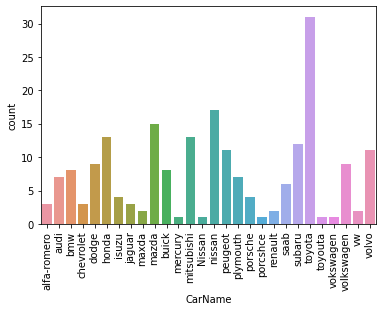

In [ ]:
sns.countplot(data=df, x='CarName')
plt.xticks(rotation=90)

Toyota seems to be the favored car company.

#Data Cleaning

In [ ]:
df.drop(columns = ['car_ID'], axis = 1, inplace = True)

In [ ]:
df['doornumber'] = df['doornumber'].map({'two': 2, 'four': 4})

In [ ]:
df['cylindernumber'] = df['cylindernumber'].map({'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12})

In [ ]:
X = df.drop('price', axis = 1)
y = df['price']

In [ ]:
X = pd.get_dummies(X, drop_first = True)
X.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,1,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


#Training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.score(X_train, y_train)

0.9746248199072909

In [ ]:
lm.score(X_test, y_test)

0.8890235247734746

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
import numpy as np   # Evaluation 
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 1674.4806067342074
MSE: 7328594.610170545
RMSE: 2707.1377154054326
